In [19]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("D:/Data/Datasets/heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.shape

(303, 14)

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
x = data.drop(columns=['target'])
y = data.target

In [8]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=100)

In [12]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [13]:
y_pred = log_reg.predict(x_test)

In [14]:
accuracy_score(y_test,y_pred) 

0.8552631578947368

In [15]:
confusion_matrix(y_test,y_pred)

array([[31,  9],
       [ 2, 34]], dtype=int64)

In [16]:
auc = roc_auc_score(y_test,y_pred)
auc

0.8597222222222222

In [17]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

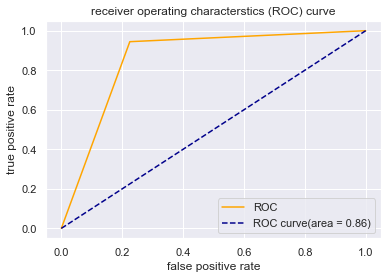

In [18]:
plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

In [20]:
f1_score(y_test,y_pred)

0.8607594936708861

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85        40
           1       0.79      0.94      0.86        36

    accuracy                           0.86        76
   macro avg       0.87      0.86      0.86        76
weighted avg       0.87      0.86      0.85        76

